In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [2]:
dt = 1 / 500
N = 1000
ts = np.arange(0, dt * N, dt)

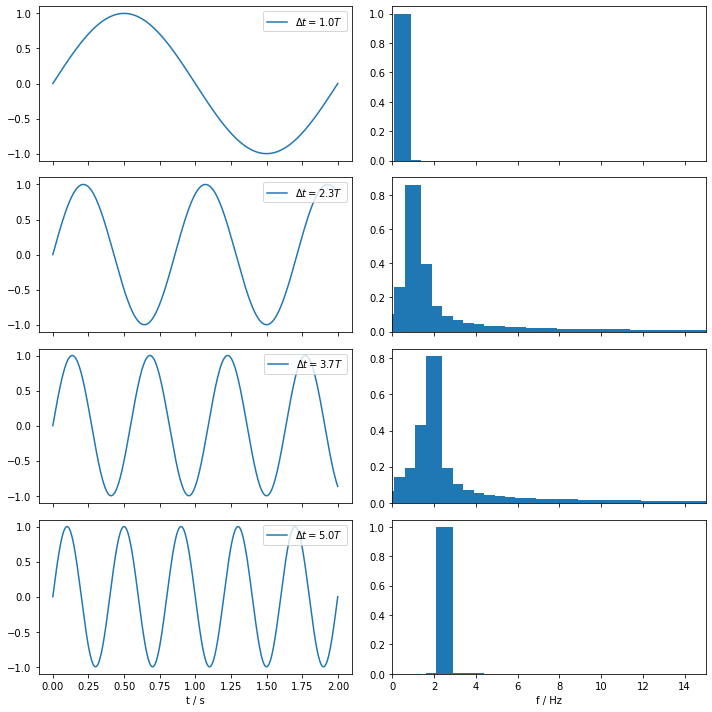

In [3]:
k = 4
ns = np.linspace(1, 5, k)

fig, axs = plt.subplots(k, 2, sharex='col', figsize=(10,10))
for i, n in enumerate(ns):
    f = n/ (np.max(ts))
    ys = np.sin(2 * np.pi * f * ts)
    axs[i][0].plot(ts, ys, label=f'$\\Delta t = {n:.2} T$')


    yfft = fft(ys)
    yfft =  2.0 / N * np.abs(yfft[0:N//2])
    yfft[0] = yfft[0] / 2
    axs[i][1].bar(fftfreq(N, d=dt)[0:N//2], yfft, )
    axs[i][1].set(xlim=[0, 15])
    axs[i][0].legend(loc=1)


axs[-1][1].set(xlabel='f / Hz')
axs[-1][0].set(xlabel='t / s')
fig.tight_layout()
fig.savefig('out/leakage')

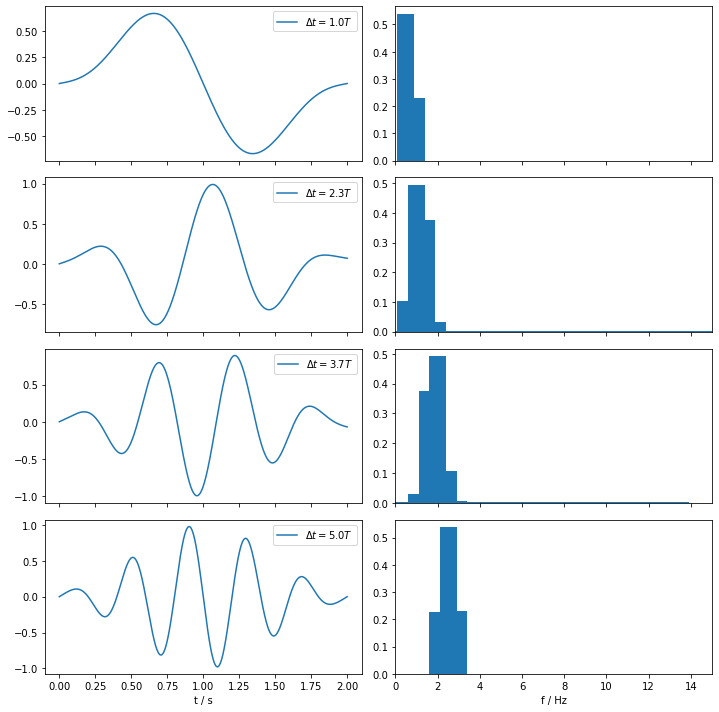

In [4]:
from scipy import signal

fig2, axs2 = plt.subplots(k, 2, sharex='col', figsize=(10,10))
window = signal.windows.hamming(N)
for i, n in enumerate(ns):
    f = n/ (np.max(ts))
    ys = np.sin(2 * np.pi * f * ts) * window
    axs2[i][0].plot(ts, ys, label=f'$\\Delta t = {n:.2} T$')


    yfft = fft(ys)
    yfft =  2.0 / N * np.abs(yfft[0:N//2])
    yfft[0] = yfft[0] / 2
    axs2[i][1].bar(fftfreq(N, d=dt)[0:N//2], yfft, )
    axs2[i][1].set(xlim=[0, 15])
    axs2[i][0].legend(loc=1)


axs2[-1][1].set(xlabel='f / Hz')
axs2[-1][0].set(xlabel='t / s')
fig2.tight_layout()
fig2.savefig('out/window_hamming')

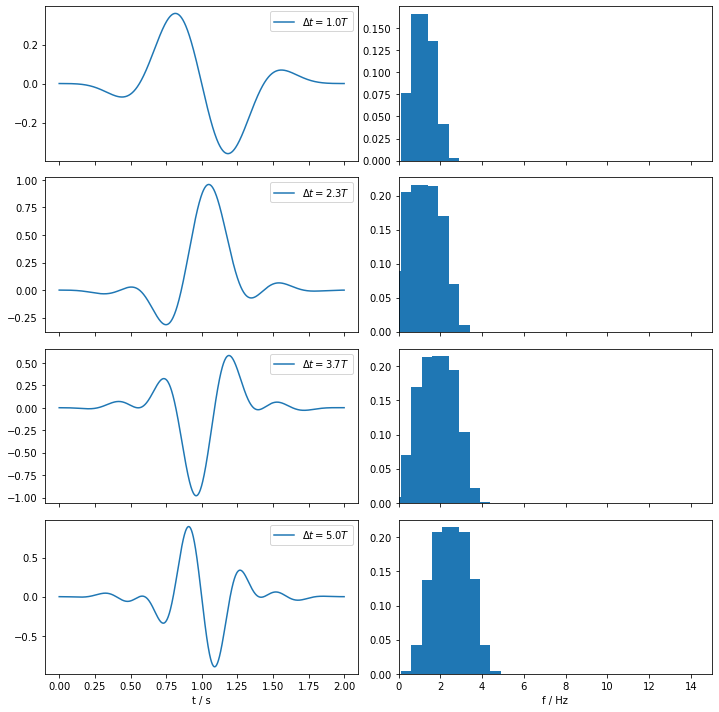

In [6]:
fig3, axs3 = plt.subplots(k, 2, sharex='col', figsize=(10,10))
window = signal.windows.flattop(N)
for i, n in enumerate(ns):
    f = n/ (np.max(ts))
    ys = np.sin(2 * np.pi * f * ts) * window
    axs3[i][0].plot(ts, ys, label=f'$\\Delta t = {n:.2} T$')


    yfft = fft(ys)
    yfft =  2.0 / N * np.abs(yfft[0:N//2])
    yfft[0] = yfft[0] / 2
    axs3[i][1].bar(fftfreq(N, d=dt)[0:N//2], yfft, )
    axs3[i][1].set(xlim=[0, 15])
    axs3[i][0].legend(loc=1)


axs3[-1][1].set(xlabel='f / Hz')
axs3[-1][0].set(xlabel='t / s')
fig3.tight_layout()
fig3.savefig('out/window_flattop')

No handles with labels found to put in legend.


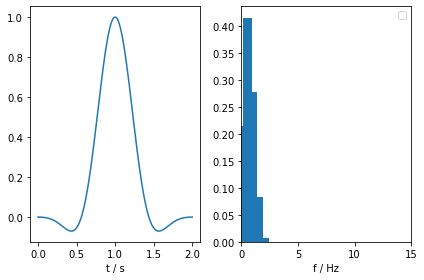

In [11]:
fig4, (ax5, ax6) = plt.subplots(1, 2)
window = signal.windows.flattop(N)

ys = window
ax5.plot(ts, ys, label=f'$Flattop$')

yfft = fft(ys)
yfft =  2.0 / N * np.abs(yfft[0:N//2])
yfft[0] = yfft[0] / 2
ax6.bar(fftfreq(N, d=dt)[0:N//2], yfft, )
ax6.set(xlim=[0, 15])
ax6.legend(loc=1)


ax6.set(xlabel='f / Hz')
ax5.set(xlabel='t / s')
fig4.tight_layout()
fig4.savefig('out/window_hamming_fft')